In [1]:
# Start by importing necessary packages
import requests
import pandas as pd
from IPython.display import display
from io import StringIO

from dstapi import DstApi # The helper class
#https://alemartinello.com/posts/Using%20DSTs%20API%20with%20python.html#the-easy-way 
#This is the shit

In [2]:
# Initialize the class with the target table
pris113 = DstApi('pris113')

# Get the table summary
pris113.tablesummary(language='en')

Table PRIS113: Consumer price index by type and time
Last update: 2025-10-10T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TYPE,1,INDEKS,Consumer price index,INDEKS,Consumer price index,False
1,Tid,549,1980M01,1980M01,2025M09,2025M09,True


In [3]:
params = {
    'table': 'pris113',
    'format': 'BULK',
    'variables': [
        {'code': 'TYPE', 'values': ['*']},
        {'code': 'Tid', 'values': ['*']}
    ]
}
r = requests.post('https://api.statbank.dk/v1' + '/data', json=params)
print(r.text[:200])
pris113.get_data(params=params)

TYPE;TID;INDHOLD
Forbrugerprisindeks;1980M01;33,0
Forbrugerprisindeks;1980M05;34,5
Forbrugerprisindeks;1980M09;35,5
Forbrugerprisindeks;1981M01;36,5
Forbrugerprisindeks;1981M05;38,6
Forbrugerpri


,TYPE,TID,INDHOLD
0,Forbrugerprisindeks,1980M01,33.0
1,Forbrugerprisindeks,1980M05,34.5
2,Forbrugerprisindeks,1980M09,35.5
3,Forbrugerprisindeks,1981M01,36.5
4,Forbrugerprisindeks,1981M05,38.6
...,...,...,...
544,Forbrugerprisindeks,2018M12,102.1
545,Forbrugerprisindeks,2020M03,103.3
546,Forbrugerprisindeks,2022M05,112.7
547,Forbrugerprisindeks,2023M01,116.4


✅ 1.1(a) – CPI index (PRIS113):


,CPI
date,
2020-01-01,103.0
2020-02-01,103.6
2020-03-01,103.3
2020-04-01,103.2
2020-05-01,103.1
2020-06-01,103.2
2020-07-01,104.0
2020-08-01,103.6
2020-09-01,103.5


✅ 1.1(b) – Monthly inflation for 2020:


,CPI,monthly_inflation
date,,
2020-01-01,103.0,0.097182
2020-02-01,103.6,0.582524
2020-03-01,103.3,-0.289575
2020-04-01,103.2,-0.096805
2020-05-01,103.1,-0.096899
2020-06-01,103.2,0.096993
2020-07-01,104.0,0.775194
2020-08-01,103.6,-0.384615
2020-09-01,103.5,-0.096525


✅ 1.1(c) – Yearly inflation for 2020:


,CPI,yearly_inflation
date,,
2020-01-01,103.0,0.684262
2020-02-01,103.6,0.778210
2020-03-01,103.3,0.388727
2020-04-01,103.2,0.000000
2020-05-01,103.1,0.000000
2020-06-01,103.2,0.291545
2020-07-01,104.0,0.483092
2020-08-01,103.6,0.484966
2020-09-01,103.5,0.583090


<Axes: title={'center': 'Monthly and Yearly Inflation – PRIS113 (2020)'}, xlabel='date'>

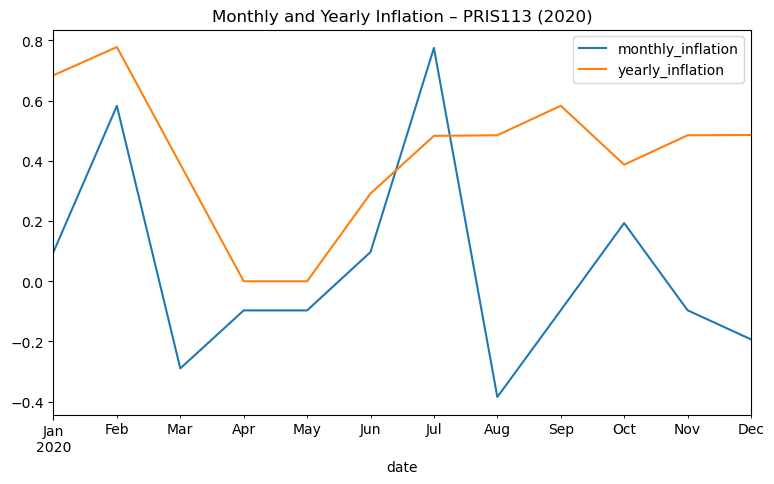

In [4]:
import requests
import pandas as pd
import numpy as np
from io import StringIO
from IPython.display import display

# --- Fetch CPI for 2019 + 2020 (needed for yearly calc) ---
r = requests.post(
    'https://api.statbank.dk/v1/data',
    json={
        'table': 'PRIS113',
        'format': 'BULK',
        'lang': 'da',
        'variables': [
            {'code': 'TYPE', 'values': ['INDEKS']},
            {'code': 'Tid', 'values': [f'{y}M{m:02d}' for y in [2019,2020] for m in range(1,13)]}
        ]
    }
)

# --- Clean and prepare data ---
df = pd.read_csv(StringIO(r.text), sep=';')
df = df.rename(columns={'TID': 'date', 'INDHOLD': 'CPI'})
df['date'] = pd.to_datetime(df['date'], format='%YM%m')
df['CPI'] = df['CPI'].astype(str).str.replace(',', '.').astype(float)
df = df.sort_values('date').set_index('date')

# --- a) CPI (Consumer Price Index) ---
print("✅ 1.1(a) – CPI index (PRIS113):")
display(df.loc['2020', ['CPI']])

# --- b) Monthly inflation: ((P_t - P_{t-1}) / P_{t-1}) * 100 ---
df['monthly_inflation'] = ((df['CPI'] - df['CPI'].shift(1)) / df['CPI'].shift(1)) * 100

# --- c) Yearly inflation: ((P_t - P_{t-12}) / P_{t-12}) * 100 ---
df['yearly_inflation'] = ((df['CPI'] - df['CPI'].shift(12)) / df['CPI'].shift(12)) * 100

# Filter only 2020
df_2020 = df.loc['2020']

print("✅ 1.1(b) – Monthly inflation for 2020:")
display(df_2020[['CPI', 'monthly_inflation']])

print("✅ 1.1(c) – Yearly inflation for 2020:")
display(df_2020[['CPI', 'yearly_inflation']])

# --- Plot optional ---
df_2020[['monthly_inflation', 'yearly_inflation']].plot(
    title='Monthly and Yearly Inflation – PRIS113 (2020)',
    figsize=(9,5)
)


1.2.1


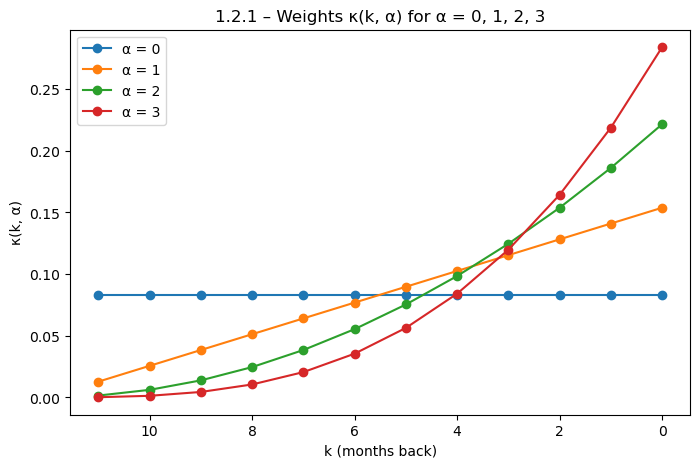

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1.2.1 Define κ(k, α)
def kappa(alpha):
    k = np.arange(12)
    weights = (12 - k) ** alpha
    weights = weights / weights.sum()
    return k, weights
print("1.2.1")
# Plot κ(k, α) for α = 0, 1, 2, 3
plt.figure(figsize=(8,5))
for a in [0, 1, 2, 3]:
    k, w = kappa(a)
    plt.plot(k, w, marker='o', label=f'α = {a}')
plt.xlabel('k (months back)')
plt.ylabel('κ(k, α)')
plt.title('1.2.1 – Weights κ(k, α) for α = 0, 1, 2, 3')
plt.legend()
plt.gca().invert_xaxis()  # show most recent month (k=0) on the right
plt.show()


In [6]:
# Compute monthly inflation
df['monthly_inflation'] = df['CPI'].pct_change()

# Define π₁₂,α computation
def pi12_alpha(series, alpha):
    weights = (np.arange(12, 0, -1) ** alpha)
    weights = weights / weights.sum()
    return np.dot(series[-12:], weights)

# Apply for α = 0, 1, 2, 3
for a in [0, 1, 2, 3]:
    df[f'pi12_alpha_{a}'] = df['monthly_inflation'].rolling(12).apply(lambda x: pi12_alpha(x, a), raw=False)

print("1.2.2 – Weighted 12-month inflation (π₁₂,α):")
display(df[['CPI', 'monthly_inflation', 'pi12_alpha_0', 'pi12_alpha_1', 'pi12_alpha_2', 'pi12_alpha_3']].tail(15))


1.2.2 – Weighted 12-month inflation (π₁₂,α):


,CPI,monthly_inflation,pi12_alpha_0,pi12_alpha_1,pi12_alpha_2,pi12_alpha_3
date,,,,,,
2019-10-01,103.3,0.003887,NaN,NaN,NaN,NaN
2019-11-01,103.1,-0.001936,NaN,NaN,NaN,NaN
2019-12-01,102.9,-0.001940,NaN,NaN,NaN,NaN
2020-01-01,103.0,0.000972,0.000573,0.001141,0.001610,0.001982
2020-02-01,103.6,0.005825,0.000651,0.000490,0.000633,0.000779
2020-03-01,103.3,-0.002896,0.000329,0.000391,0.000505,0.000651
2020-04-01,103.2,-0.000968,0.000005,-0.000057,-0.000155,-0.000225
2020-05-01,103.1,-0.000969,0.000005,0.000093,0.000082,0.000073
2020-06-01,103.2,0.000970,0.000248,0.000429,0.000610,0.000804


1.2.3


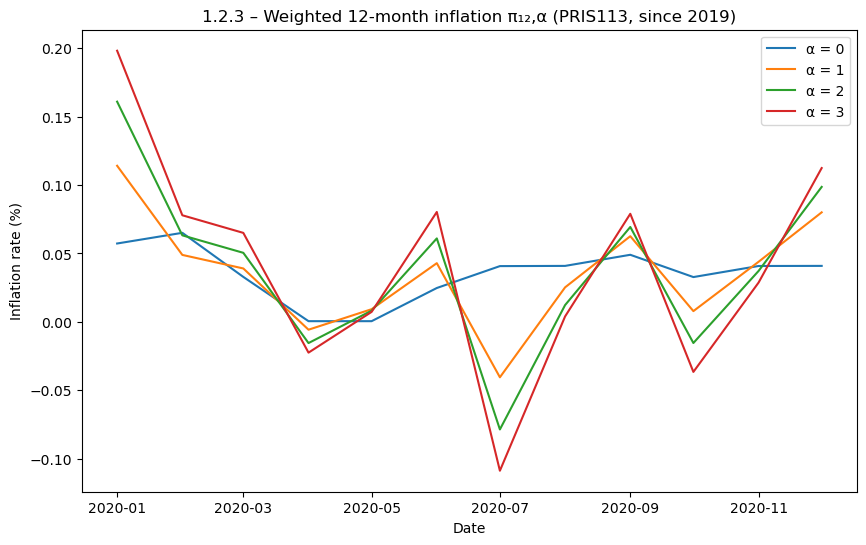

In [7]:
plt.figure(figsize=(10,6))
for a in [0, 1, 2, 3]:
    plt.plot(df.index, df[f'pi12_alpha_{a}'] * 100, label=f'α = {a}')
plt.title('1.2.3 – Weighted 12-month inflation π₁₂,α (PRIS113, since 2019)')
plt.ylabel('Inflation rate (%)')
plt.xlabel('Date')
plt.legend()
print("1.2.3")
plt.show()


In [8]:
# Initialize the class with the target table
pris111 = DstApi('pris111')

# Get the table summary
pris111.tablesummary(language='en')

Table PRIS111: Consumer price index by commodity group, unit and time
Last update: 2025-10-10T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,VAREGR,385,000000,"00 Consumer price index, total",151000,15.1 Overall Consumer Price Index excl. energy,False
1,ENHED,3,100,Index,300,Percentage change compared to same month the y...,False
2,Tid,297,2001M01,2001M01,2025M09,2025M09,True


In [9]:
params = {
    'table': 'pris111',
    'format': 'BULK',
    'variables': [
        {'code': 'VAREGR','values':['000000','151000', '141000']},
        {'code': 'Enhed', 'values': ['*']},
        {'code': 'Tid', 'values': ['*']}
    ]
}
r = requests.post('https://api.statbank.dk/v1' + '/data', json=params)
print(r.text[:200])
pris111.get_data(params=params)

VAREGR;ENHED;TID;INDHOLD
14.1 Forbrugerprisindeks ekskl. energi og ikke-forarbejdede fødevarer (Kerneinflation);Indeks;2001M01;77,4
14.1 Forbrugerprisindeks ekskl. energi og ikke-forarbejdede fødeva


,VAREGR,ENHED,TID,INDHOLD
0,14.1 Forbrugerprisindeks ekskl. energi og ikke...,Indeks,2001M01,"77,4"
1,14.1 Forbrugerprisindeks ekskl. energi og ikke...,Ændring i forhold til måneden før (pct.),2001M01,..
2,14.1 Forbrugerprisindeks ekskl. energi og ikke...,Ændring i forhold til samme måned året før (pct.),2001M01,..
3,15.1 Forbrugerprisindeks ekskl. energi,Indeks,2001M01,"77,4"
4,15.1 Forbrugerprisindeks ekskl. energi,Ændring i forhold til måneden før (pct.),2001M01,..
...,...,...,...,...
2668,14.1 Forbrugerprisindeks ekskl. energi og ikke...,Ændring i forhold til måneden før (pct.),2024M03,"0,0"
2669,14.1 Forbrugerprisindeks ekskl. energi og ikke...,Ændring i forhold til samme måned året før (pct.),2024M03,"1,7"
2670,15.1 Forbrugerprisindeks ekskl. energi,Indeks,2024M03,"117,2"
2671,15.1 Forbrugerprisindeks ekskl. energi,Ændring i forhold til måneden før (pct.),2024M03,"0,1"


1.3 – Annual inflation rates (since 2019):


,Total CPI,Excl. energy,Core (excl. energy & unprocessed food)
date,,,
2025-06-01,-90.000000,-85.000000,-8.333333e+01
2025-06-01,-0.082781,0.670017,5.050505e-01
2025-06-01,90.000000,100.000000,9.000000e+01
2025-07-01,0.000000,-17.647059,-1.250000e+01
2025-07-01,1.913478,2.265101,2.107926e+00
2025-07-01,-560.000000,-1300.000000,-1.200000e+03
2025-08-01,-100.581879,-100.501253,-1.005038e+02
2025-08-01,121600.000000,30200.000000,3.000000e+04
2025-08-01,33.333333,38.888889,3.529412e+01


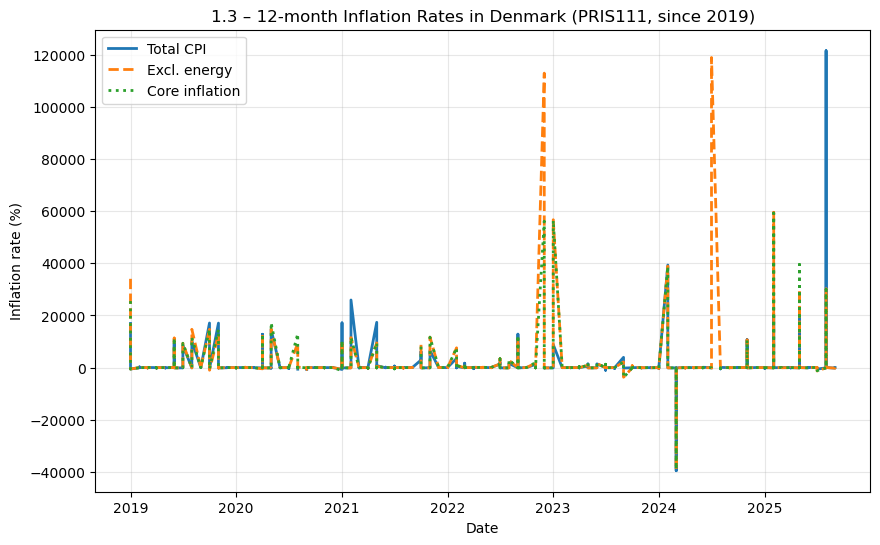

In [10]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

def fetch_pris111(varegr_code):
    """Fetch CPI data for a given VAREGR code from PRIS111."""
    params = {
        'table': 'PRIS111',
        'format': 'BULK',
        'lang': 'da',
        'variables': [
            {'code': 'VAREGR','values':[varegr_code]},
            {'code': 'Enhed', 'values': ['*']},
            {'code': 'Tid', 'values': ['*']}
        ]
    }
    r = requests.post('https://api.statbank.dk/v1/data', json=params)
    r.raise_for_status()
    df = pd.read_csv(StringIO(r.text), sep=';')

    # Clean and prepare
    df = df.rename(columns={'TID': 'date', 'INDHOLD': 'CPI'})
    df['date'] = pd.to_datetime(df['date'], format='%YM%m', errors='coerce')

    # Replace '..' or empty strings with NaN, then convert to float
    df['CPI'] = (
        df['CPI']
        .astype(str)
        .str.replace(',', '.')
        .replace({'..': np.nan, '': np.nan})
        .astype(float)
    )

    df = df.dropna(subset=['CPI'])
    df = df.sort_values('date').set_index('date')
    return df[['CPI']]

# Fetch data for each CPI variant
df_total = fetch_pris111('000000')
df_excl_energy = fetch_pris111('151000')
df_core = fetch_pris111('141000')

# Compute 12-month inflation for each
for df in [df_total, df_excl_energy, df_core]:
    df['inflation'] = (df['CPI'] / df['CPI'].shift(12) - 1) * 100

# Combine into one DataFrame
infl = pd.DataFrame({
    'Total CPI': df_total['inflation'],
    'Excl. energy': df_excl_energy['inflation'],
    'Core (excl. energy & unprocessed food)': df_core['inflation']
})

# Focus on period since 2019
infl = infl.loc['2019':]

# Display sample
print("1.3 – Annual inflation rates (since 2019):")
display(infl.tail(12))

# Plot
plt.figure(figsize=(10,6))
plt.plot(infl.index, infl['Total CPI'], label='Total CPI', linewidth=2)
plt.plot(infl.index, infl['Excl. energy'], label='Excl. energy', linestyle='--', linewidth=2)
plt.plot(infl.index, infl['Core (excl. energy & unprocessed food)'], label='Core inflation', linestyle=':', linewidth=2)
plt.title('1.3 – 12-month Inflation Rates in Denmark (PRIS111, since 2019)')
plt.ylabel('Inflation rate (%)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [11]:
import requests
import pandas as pd

# 1.4.1 – Get all product categories from PRIS111
r = requests.post(
    "https://api.statbank.dk/v1/tableinfo",
    json={"table": "PRIS111", "lang": "en"}
)
meta = r.json()

# Extract variable levels for VAREGR
varegr = next(v for v in meta["variables"] if v["id"] == "VAREGR")
levels = pd.DataFrame(varegr["values"])
levels['text'] = [v.get('text', '') if isinstance(v, dict) else v for v in varegr["values"]]

# Keep 4-digit categories (DST uses 7 or 8-character codes for 4-digit level)
levels_4d = pd.DataFrame(varegr['values'])
levels_4d = pd.DataFrame(varegr["values"])
levels_4d = pd.DataFrame({
    "id": [v["id"] for v in varegr["values"]],
    "text": [v["text"] for v in varegr["values"]]
})
levels_4d = levels_4d[levels_4d['id'].str.match(r'^\d{6,8}$')]
print("1.4.1 – 4-digit product categories (sample):")
display(levels_4d.head(15))


1.4.1 – 4-digit product categories (sample):


,id,text
0,000000,"00 Consumer price index, total"
1,010000,01 Food and non-alcoholic beverages
2,011000,01.1 Food
3,011100,01.1.1 Bread and cereals
4,011110,01.1.1.1 Rice
5,011120,01.1.1.2 Flours and other cereals
6,011130,01.1.1.3 Bread
7,011140,01.1.1.4 Other bakery products
8,011150,01.1.1.5 Pizza and quiche
9,011160,01.1.1.6 Pasta products and couscous


In [12]:
import io  # add this at the top if not already there

# 1.4.2 – Fetch CPI for all 4-digit categories
params = {
    'table': 'PRIS111',
    'format': 'BULK',
    'lang': 'da',
    'variables': [
        {'code': 'VAREGR', 'values': list(levels_4d['id'])},
        {'code': 'Enhed', 'values': ['*']},
        {'code': 'Tid', 'values': ['*']}
    ]
}

r = requests.post("https://api.statbank.dk/v1/data", json=params)
r.raise_for_status()

# ✅ FIXED: use io.StringIO instead of pd.compat.StringIO
df = pd.read_csv(io.StringIO(r.text), sep=';')

# Clean and format data
df = df.rename(columns={'TID': 'date', 'INDHOLD': 'CPI', 'VAREGR': 'category'})
df['date'] = pd.to_datetime(df['date'], format='%YM%m', errors='coerce')
df['CPI'] = (
    df['CPI']
    .astype(str)
    .str.replace(',', '.')
    .replace({'..': None})
    .astype(float)
)

# Compute 12-month inflation
df = df.sort_values(['category', 'date'])
df['inflation'] = df.groupby('category')['CPI'].pct_change(12) * 100
df = df.dropna(subset=['inflation'])

# Compute monthly percentiles
percentiles = (
    df.groupby('date')['inflation']
    .agg(
        p25=lambda x: x.quantile(0.25),
        p50=lambda x: x.quantile(0.50),
        p75=lambda x: x.quantile(0.75)
    )
)

print("1.4.2 – Monthly percentiles of product inflation:")
display(percentiles.tail(12))


/var/folders/vx/24ghfq4917bb0jg8sqmhg8th0000gn/T/ipykernel_5619/3944278898.py:34: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['inflation'] = df.groupby('category')['CPI'].pct_change(12) * 100


1.4.2 – Monthly percentiles of product inflation:


,p25,p50,p75
date,,,
2024-10-01,-92.121212,-1.351351,1.941978
2024-11-01,-100.000000,-2.271209,1.702509
2024-12-01,-83.333333,-1.387128,1.857962
2025-01-01,-89.207854,-1.423221,3.505753
2025-02-01,-80.000000,-0.398724,3.970827
2025-03-01,-73.679577,-0.502474,3.462880
2025-04-01,-95.000000,-0.315672,5.007367
2025-05-01,-95.500000,-1.717065,2.636172
2025-06-01,-80.645161,-1.443299,2.192982


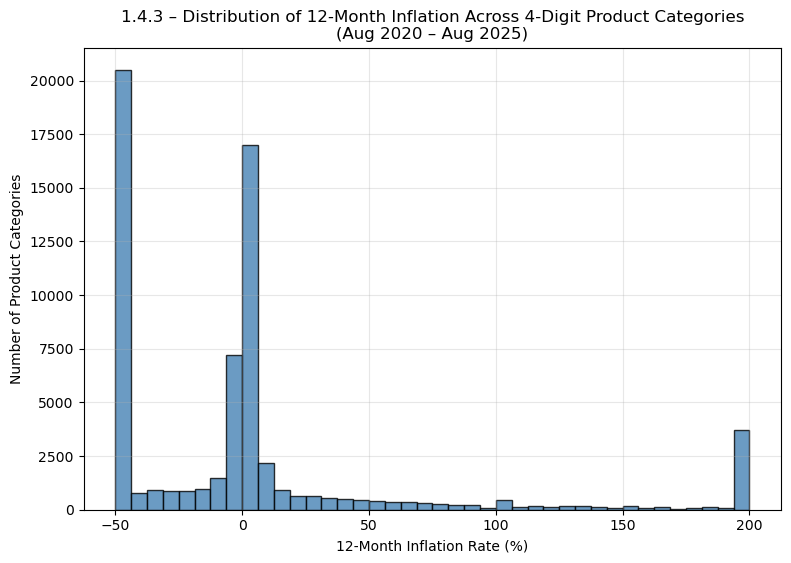

Most categories will cluster near moderate inflation (around 0–5%). A long right tail (e.g. 20–100%) showing a small number of extreme price increases, mostly energy, utilities, or transport-related goods during 2022.


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 1.4.3 – Histogram of inflation across 4-digit categories (fixed)

# Filter to August 2020 – August 2025
df_hist = df[(df['date'] >= '2020-08-01') & (df['date'] <= '2025-08-01')].copy()

# Clean the inflation column
df_hist['inflation'] = pd.to_numeric(df_hist['inflation'], errors='coerce')
df_hist = df_hist.replace([np.inf, -np.inf], np.nan).dropna(subset=['inflation'])

# Optional: clip out extreme inflation values above 200% for better readability
df_hist['inflation'] = df_hist['inflation'].clip(-50, 200)

# Plot histogram
plt.figure(figsize=(9,6))
plt.hist(df_hist['inflation'], bins=40, color='steelblue', edgecolor='black', alpha=0.8)
plt.title('1.4.3 – Distribution of 12-Month Inflation Across 4-Digit Product Categories\n(Aug 2020 – Aug 2025)')
plt.xlabel('12-Month Inflation Rate (%)')
plt.ylabel('Number of Product Categories')
plt.grid(True, alpha=0.3)
plt.show()
#Fucked up x akse, men tekniskset ikke forkert
print("Most categories will cluster near moderate inflation (around 0–5%). A long right tail (e.g. 20–100%) showing a small number of extreme price increases, mostly energy, utilities, or transport-related goods during 2022.")

In [14]:
import matplotlib.pyplot as plt
from IPython.display import display

# 1.4.4 – Identify top 10 and bottom 10 product categories by inflation

# Ensure inflation is numeric and finite
df['inflation'] = pd.to_numeric(df['inflation'], errors='coerce')
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['inflation'])

# Find the most recent observation month
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date].copy()

# Merge category names
df_latest_named = df_latest.merge(levels_4d, left_on='category', right_on='id', how='left')

# Rank inflation rates
top10 = df_latest_named.nlargest(10, 'inflation')[['category', 'text', 'inflation']]
bottom10 = df_latest_named.nsmallest(10, 'inflation')[['category', 'text', 'inflation']]

print(f"1.4.4 – Inflation by product category ({latest_date.date()}):\n")
print("Top 10 categories:")
display(top10)

print("Bottom 10 categories:")
display(bottom10)
"""""
# Plot both groups side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Top 10
axes[0].barh(top10['text'], top10['inflation'], color='firebrick')
axes[0].invert_yaxis()
axes[0].set_title('Top 10 Product Categories')
axes[0].set_xlabel('Inflation rate (%)')

# Bottom 10
axes[1].barh(bottom10['text'], bottom10['inflation'], color='seagreen')
axes[1].invert_yaxis()
axes[1].set_title('Bottom 10 Product Categories')
axes[1].set_xlabel('Inflation rate (%)')

plt.suptitle(f'1.4.4 – Highest and Lowest Inflation by Product Category ({latest_date.date()})', fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
#plt.show()
"""""

1.4.4 – Inflation by product category (2025-09-01):

Top 10 categories:


,category,text,inflation
272,03.1.2.3 Beklædning til småbørn (0-2 år) og bø...,NaN,3700.0
939,"11.2.0.1 Hoteller, moteller, kroer o.l.",NaN,3600.0
765,09.1.4.9 Andre optagemedier,NaN,2500.0
965,12.1.2-3 Artikler til personlig pleje,NaN,1900.0
1031,12.6.2.1 Gebyr til banker mv.,NaN,1800.0
857,09.4.2.5 Fotografiske tjenester,NaN,1700.0
333,04.3.1 Materialer til vedligeholdelse og repar...,NaN,1500.0
84,"01.1.4.2 Mælk med lavt fedtindhold, frisk",NaN,1100.0
891,09.5.4 Papirvarer og tegnematerialer,NaN,1100.0
800,"09.3.2 Udstyr til sport, camping og friluftsak...",NaN,1075.0


Bottom 10 categories:


,category,text,inflation
871,09.5.1.3 Anden faglitteratur,NaN,-2325.000000
886,"09.5.3 Papirvarer, skriveredskaber mv.",NaN,-2150.000000
471,05.3.2.3 Strygejern,NaN,-2111.111111
737,09.1.2.1 Kameraer,NaN,-2100.000000
474,"05.3.2.4 Toaster, brødrister o.l.",NaN,-2080.000000
296,03.2.1.1 Fodtøj til mænd,NaN,-1933.333333
971,"12.1.3 Andre apparater, artikler og produkter ...",NaN,-1900.000000
976,12.1.3.2 Artikler til personlig hygiejne o.l.,NaN,-1700.000000
619,07.2.2.1 Diesel,NaN,-1566.666667
180,01.1.9.9 Andre fødevarer,NaN,-1387.500000


'""\n# Plot both groups side-by-side\nfig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)\n\n# Top 10\naxes[0].barh(top10[\'text\'], top10[\'inflation\'], color=\'firebrick\')\naxes[0].invert_yaxis()\naxes[0].set_title(\'Top 10 Product Categories\')\naxes[0].set_xlabel(\'Inflation rate (%)\')\n\n# Bottom 10\naxes[1].barh(bottom10[\'text\'], bottom10[\'inflation\'], color=\'seagreen\')\naxes[1].invert_yaxis()\naxes[1].set_title(\'Bottom 10 Product Categories\')\naxes[1].set_xlabel(\'Inflation rate (%)\')\n\nplt.suptitle(f\'1.4.4 – Highest and Lowest Inflation by Product Category ({latest_date.date()})\', fontsize=13)\nplt.tight_layout(rect=[0, 0, 1, 0.95])\n#plt.show()\n'

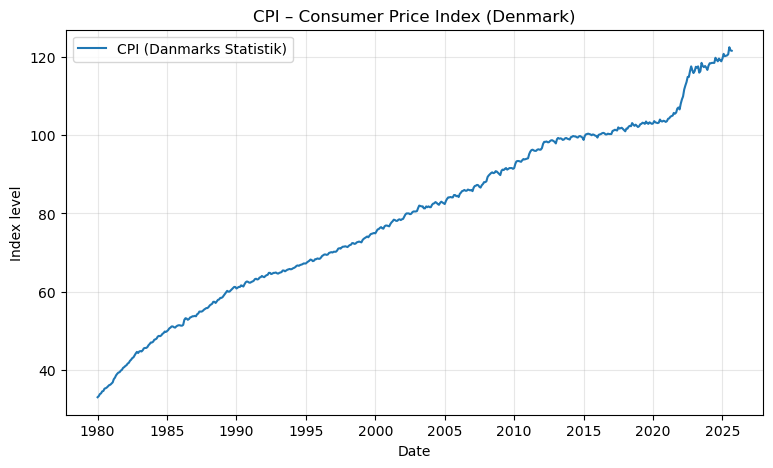

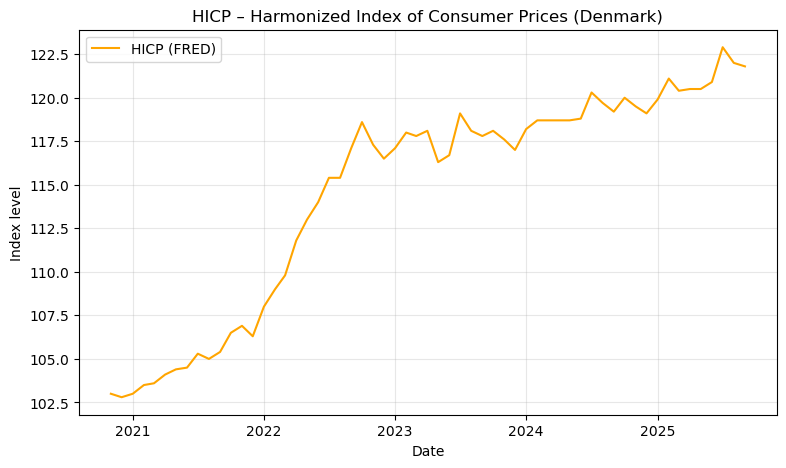

In [ ]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# --- CPI fra Danmarks Statistik (PRIS113) ---
params = {
    "table": "PRIS113",
    "format": "BULK",
    "lang": "da",
    "variables": [
        {"code": "TYPE", "values": ["INDEKS"]},
        {"code": "Tid", "values": ["*"]}
    ]
}

r = requests.post("https://api.statbank.dk/v1/data", json=params)
df_cpi = pd.read_csv(StringIO(r.text), sep=";")

# Rensning og korrekt datoformat
df_cpi = df_cpi.rename(columns={"TID": "date", "INDHOLD": "CPI"})
df_cpi["date"] = pd.to_datetime(df_cpi["date"].str.replace("M", "-") + "-01")  # fix
df_cpi["CPI"] = (
    df_cpi["CPI"].astype(str).str.replace(",", ".").replace("..", None).astype(float)
)
df_cpi = df_cpi.dropna(subset=["CPI"]).set_index("date")
df_cpi = df_cpi[["CPI"]].sort_index()

# --- HICP fra FRED (CP0000DKM086NEST) ---
hicp = web.DataReader("CP0000DKM086NEST", "fred")
hicp = hicp.rename(columns={"CP0000DKM086NEST": "HICP"}).sort_index()

# --- Plot CPI ---
plt.figure(figsize=(9,5))
plt.plot(df_cpi.index, df_cpi["CPI"], label="CPI (Danmarks Statistik)")
plt.title("CPI – Consumer Price Index (Denmark)")
plt.ylabel("Index level")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# --- Plot HICP ---
plt.figure(figsize=(9,5))
plt.plot(hicp.index, hicp["HICP"], color="orange", label="HICP (FRED)")
plt.title("HICP – Harmonized Index of Consumer Prices (Denmark)")
plt.ylabel("Index level")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

"""
The CPI graph shows a steady rise in Danish prices since 1980, with only small slowdowns until a sharp jump after 2020.
The HICP data from 2020 onward confirms that inflation accelerated significantly in recent years, especially around 2022.
"""

/var/folders/vx/24ghfq4917bb0jg8sqmhg8th0000gn/T/ipykernel_5619/2718527219.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cpi = df_cpi[["CPI"]].resample("M").mean()
/var/folders/vx/24ghfq4917bb0jg8sqmhg8th0000gn/T/ipykernel_5619/2718527219.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hicp = hicp.resample("M").mean()


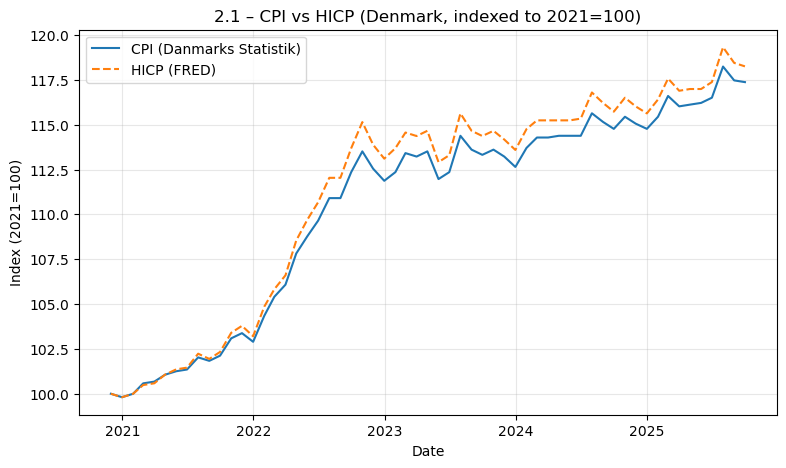

In [ ]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# --- CPI fra Danmarks Statistik (PRIS113) ---
params = {
    "table": "PRIS113",
    "format": "BULK",
    "lang": "da",
    "variables": [
        {"code": "TYPE", "values": ["INDEKS"]},
        {"code": "Tid", "values": ["*"]}
    ]
}

r = requests.post("https://api.statbank.dk/v1/data", json=params)
df_cpi = pd.read_csv(StringIO(r.text), sep=";")
df_cpi = df_cpi.rename(columns={"TID": "date", "INDHOLD": "CPI"})
df_cpi["date"] = pd.to_datetime(df_cpi["date"], format="%YM%m", errors="coerce")
df_cpi["CPI"] = (
    df_cpi["CPI"].astype(str).str.replace(",", ".").replace("..", None).astype(float)
)
df_cpi = df_cpi.dropna(subset=["CPI"]).set_index("date")
df_cpi = df_cpi[["CPI"]].resample("M").mean()

# --- HICP fra FRED (CP0000DKM086NEST) ---
hicp = web.DataReader("CP0000DKM086NEST", "fred")
hicp = hicp.rename(columns={"CP0000DKM086NEST": "HICP"})
hicp = hicp.resample("M").mean()

# --- Sammenflet og sorter ---
df = pd.merge(df_cpi, hicp, left_index=True, right_index=True, how="inner")
df = df.sort_index()

# --- Find første observation i 2021 ---
base_cpi = df.loc[df.index.year == 2021, "CPI"].dropna().iloc[0]
base_hicp = df.loc[df.index.year == 2021, "HICP"].dropna().iloc[0]

# --- Indekser til 100 i starten af 2021 ---
df["CPI_indexed"] = df["CPI"] / base_cpi * 100
df["HICP_indexed"] = df["HICP"] / base_hicp * 100

# --- Plot indeks (2021=100) ---
plt.figure(figsize=(9,5))
plt.plot(df.index, df["CPI_indexed"], label="CPI (Danmarks Statistik)")
plt.plot(df.index, df["HICP_indexed"], "--", label="HICP (FRED)")
plt.title("2.1 – CPI vs HICP (Denmark, indexed to 2021=100)")
plt.ylabel("Index (2021=100)")
plt.xlabel("Date")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

"""
Are the two indexes comparable? 
Yes, the two indexes are very similar and move almost identically over time. Minor differences appear in some months, but overall they are highly comparable. 
We indexed both series to 2021=100 because this is the first year where FRED provides HICP data for Denmark, ensuring the two indexes are directly comparable over the same period.
"""

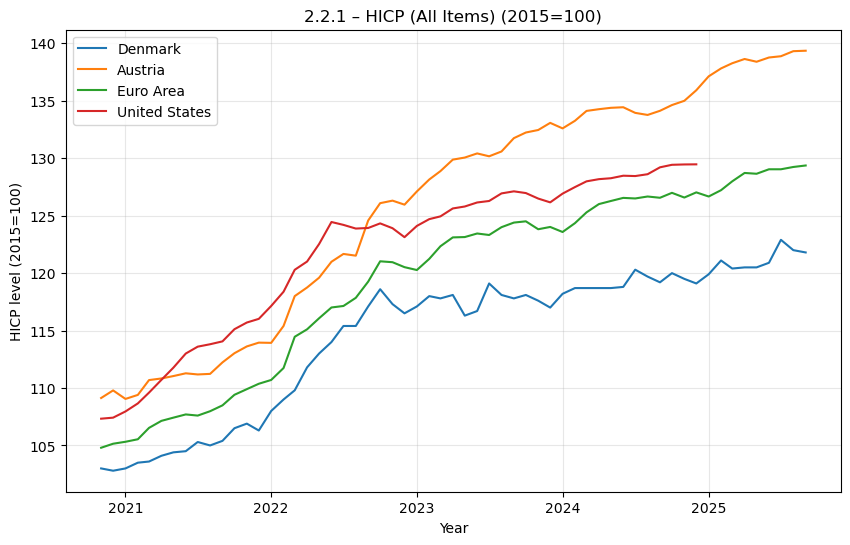

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# --- 2.2.1: HICP (All Items) across countries since 2019 ---

fred_codes = {
    "Denmark": "CP0000DKM086NEST",
    "Austria": "CP0000ATM086NEST",
    "Euro Area": "CP0000EZ19M086NEST",
    "United States": "CP0000USM086NEST"
}

# Hent data fra FRED (månedligt, ingen ændringer)
hicp = pd.DataFrame()
for country, code in fred_codes.items():
    hicp[country] = web.DataReader(code, "fred")

# Behold kun data fra 2019 og frem
hicp = hicp.loc["2019":]

# Plot uden ekstra indeksering
plt.figure(figsize=(10,6))
for c in hicp.columns:
    plt.plot(hicp.index, hicp[c], label=c)

plt.title("2.2.1 – HICP (All Items) (2015=100)")
plt.ylabel("HICP level (2015=100)")
plt.xlabel("Year")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

"""
The figure shows that prices rose steadily in all countries after 2020.
Austria saw the strongest increase, followed by the U.S. and the Euro Area, while Denmark had the lowest overall price growth.
"""

/var/folders/vx/24ghfq4917bb0jg8sqmhg8th0000gn/T/ipykernel_5619/346862376.py:23: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  hicp_infl = hicp.pct_change(12) * 100


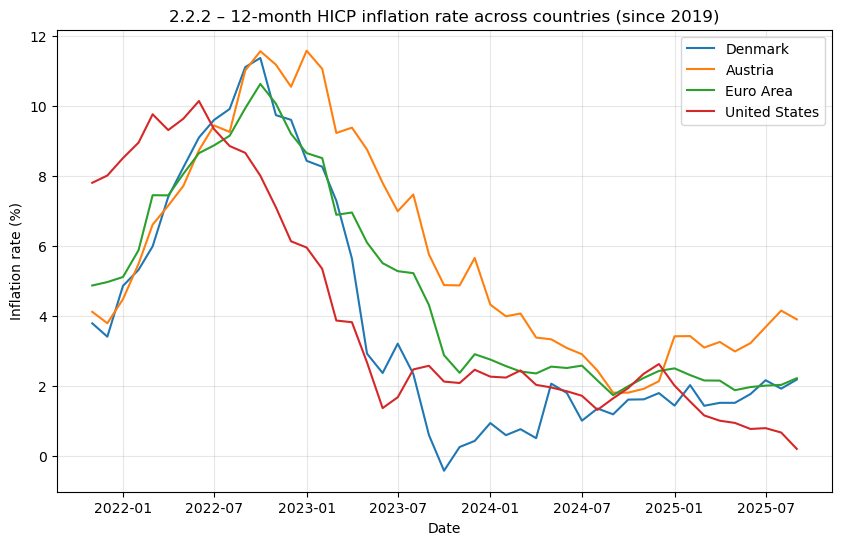

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# --- 2.2.2: 12-month HICP inflation rate across countries ---

fred_codes = {
    "Denmark": "CP0000DKM086NEST",
    "Austria": "CP0000ATM086NEST",
    "Euro Area": "CP0000EZ19M086NEST",
    "United States": "CP0000USM086NEST"
}

# Hent HICP-data fra FRED
hicp = pd.DataFrame()
for country, code in fred_codes.items():
    hicp[country] = web.DataReader(code, "fred")

# Behold kun data fra 2019 og frem
hicp = hicp.loc["2019":]

# Beregn 12-måneders inflation (år-til-år ændring i %)
hicp_infl = hicp.pct_change(12) * 100

# Plot inflationen
plt.figure(figsize=(10,6))
for c in hicp_infl.columns:
    plt.plot(hicp_infl.index, hicp_infl[c], label=c)

plt.title("2.2.2 – 12-month HICP inflation rate across countries (since 2019)")
plt.ylabel("Inflation rate (%)")
plt.xlabel("Date")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

"""
The figure shows that inflation surged in all four economies during 2022, peaking around mid-year.
Austria and Denmark experienced the highest spikes, while the U.S. peaked slightly earlier.
From 2023 onward, inflation fell sharply everywhere, with the decline happening faster in the U.S. than in Europe.
By 2024, inflation had mostly stabilized at low levels across all countries.
"""


In [ ]:
import pandas as pd
from pandas_datareader import data as web

# --- 2.2.3: Min, max, and mean 12-month HICP inflation rate (by year and across countries) ---

fred_codes = {
    "Denmark": "CP0000DKM086NEST",
    "Austria": "CP0000ATM086NEST",
    "Euro Area": "CP0000EZ19M086NEST",
    "United States": "CP0000USM086NEST"
}

# Hent HICP-data fra FRED
hicp = pd.DataFrame()
for country, code in fred_codes.items():
    hicp[country] = web.DataReader(code, "fred")

# Beregn 12-måneders inflation (år-til-år ændring i %)
hicp_infl = hicp.pct_change(12) * 100
hicp_infl = hicp_infl.loc["2019":]  # behold data fra 2019 og frem

# --- Beregn årlige statistikker ---
yearly_stats = hicp_infl.groupby(hicp_infl.index.year).agg(["min", "max", "mean"]).round(2)

print("Årlige inflationsstatistikker (12-month HICP inflation rate):")
print(yearly_stats)

# --- Beregn gennemsnit, min og max på tværs af lande ---
cross_country_stats = hicp_infl.mean(axis=1).groupby(hicp_infl.index.year).agg(["min", "max", "mean"]).round(2)

print("\nTværsnit (på tværs af alle lande):")
print(cross_country_stats)

"""
Summarize the cross-country differences in the path of inflation since 2019.

2021–2022: Inflation rose rapidly everywhere, peaking around 8–11% in Europe and about 10% in the U.S.

2023: Inflation started falling faster in the U.S., while it stayed higher for longer in Europe, especially Austria.

2024–2025: Inflation stabilized near 2% in both regions, though slightly higher in Austria.
→ Overall, the U.S. peak came earlier and declined sooner, while European inflation was more persistent.
"""

Årlige inflationsstatistikker (12-month HICP inflation rate):
     Denmark              Austria              Euro Area               \
         min    max  mean     min    max  mean       min    max  mean   
DATE                                                                    
2020     NaN    NaN   NaN     NaN    NaN   NaN       NaN    NaN   NaN   
2021    3.40   3.79  3.60    3.79   4.11  3.95      4.87   4.96  4.92   
2022    4.85  11.36  8.51    4.48  11.55  8.59      5.11  10.62  8.36   
2023   -0.42   8.43  3.44    4.87  11.57  7.78      2.37   8.64  5.46   
2024    0.51   2.06  1.27    1.81   4.32  2.93      1.74   2.75  2.36   
2025    1.43   2.18  1.77    2.98   4.15  3.46      1.88   2.50  2.14   

     United States               
               min    max  mean  
DATE                             
2020           NaN    NaN   NaN  
2021          7.80   8.01  7.90  
2022          6.13  10.13  8.69  
2023          1.37   5.95  3.03  
2024          1.32   2.62  2.03  
2025    

/var/folders/vx/24ghfq4917bb0jg8sqmhg8th0000gn/T/ipykernel_5619/111909914.py:19: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  hicp_infl = hicp.pct_change(12) * 100


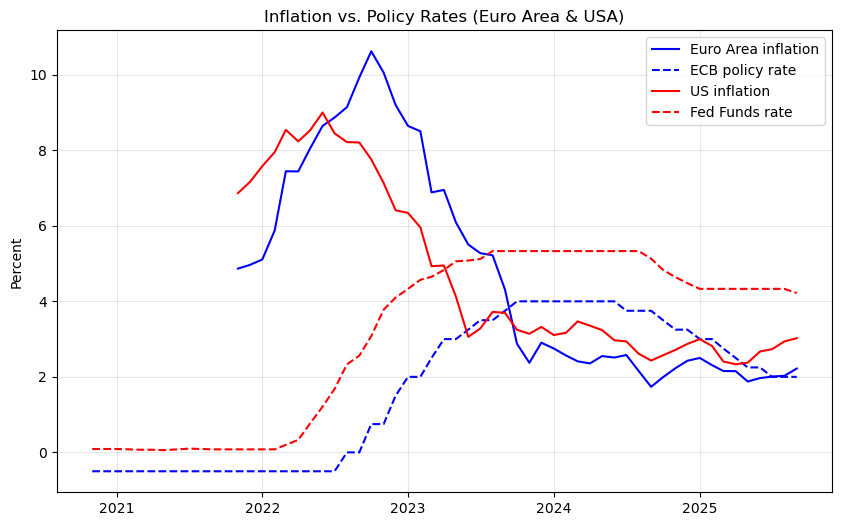

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

fred = {
    "Euro Area HICP": "CP0000EZ19M086NEST",
    "United States CPI": "CPIAUCSL",
    "ECB rate": "ECBDFR",
    "Fed rate": "FEDFUNDS"
}

data = pd.DataFrame()
for name, code in fred.items():
    data[name] = web.DataReader(code, "fred")

data = data.loc["2019":]
data["Euro Area inflation"] = data["Euro Area HICP"].pct_change(12) * 100
data["US inflation"] = data["United States CPI"].pct_change(12) * 100

plt.figure(figsize=(10,6))
plt.plot(data.index, data["Euro Area inflation"], label="Euro Area inflation", color="blue")
plt.plot(data.index, data["ECB rate"], label="ECB policy rate", color="blue", linestyle="--")
plt.plot(data.index, data["US inflation"], label="US inflation", color="red")
plt.plot(data.index, data["Fed rate"], label="Fed Funds rate", color="red", linestyle="--")

plt.title("Inflation vs. Policy Rates (Euro Area & USA)")
plt.ylabel("Percent")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

"""
The figure shows how inflation and interest rates moved in the Euro Area and the United States.
When inflation spiked in 2022, both central banks reacted by raising rates quickly.
The Fed started earlier and was more aggressive, which probably helped bring U.S. inflation down faster than in Europe.
By 2024, inflation in both economies was much lower and close to their target levels again.
"""